# Dynamics of a Spinning Symmetric Rigid Body

In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()
th,psi,thd,psidd,thdd,psidd,Omega,I1,I2,t,M1,C = \
symbols('theta,psi,thetadot,psidot,thetaddot,psiddot,Omega,I_1,I_2,t,M_1,C')
diffmap = {th:thd,psi:psid,thd:thdd,psid:psidd}

![spinning symmetric rigid body](img/ssrb.png)

Spinning Symmetric Rigid Body setup:  The body's orientation in inertial frame $\mathcal I$ is described by a 3-1-2 $(\psi,\theta,\phi)$ rotation:  the body is rotated by angle $\psi$ about $\mathbf e_3$ (creating intermediate frame $\mathcal A$), by an angle $\theta$ about $\mathbf a_1$ (creating intermediate frame $\mathcal B$), and finally spinning about $\mathbf b_2 \equiv \mathbf c_2$ at a rate $\Omega \equiv \dot\phi$, creating body-fixed frame $\mathcal C$. Note that while the body fixed frame is $\mathcal C$, all computations here are performed in $\mathcal B$ frame components.

${}^\mathcal{B}C^\mathcal{A}$:

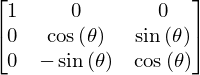

In [2]:
bCa = rotMat(1,th);bCa

$\left[{}^\mathcal{I}\boldsymbol{\omega}^\mathcal{B}\right]_\mathcal{B}$:

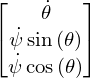

In [3]:
iWb_B = bCa*Matrix([0,0,psid])+ Matrix([thd,0,0]); iWb_B

${}^\mathcal{I}\boldsymbol{\omega}^\mathcal{C} = {}^\mathcal{I}\boldsymbol{\omega}^\mathcal{B} + {}^\mathcal{B}\boldsymbol{\omega}^\mathcal{C}$. 

$\left[{}^\mathcal{I}\boldsymbol{\omega}^\mathcal{C}\right]_\mathcal{B}$:

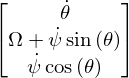

In [4]:
iWc_B = iWb_B +Matrix([0,Omega,0]); iWc_B

$\left[ \mathbb I_G \right]_\mathcal B$:

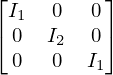

In [5]:
IG_B = diag(I1,I2,I1);IG_B

$\left[{}^\mathcal{I} \mathbf h_G\right]_\mathcal{B}$:

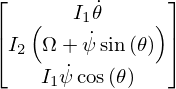

In [6]:
hG_B = IG_B*iWc_B; hG_B

$\vphantom{\frac{\mathrm{d}}{\mathrm{d}t}}^\mathcal{I}\frac{\mathrm{d}}{\mathrm{d}t}  {}^\mathcal{I} \mathbf h_G = \vphantom{\frac{\mathrm{d}}{\mathrm{d}t}}^\mathcal{B}\frac{\mathrm{d}}{\mathrm{d}t}  {}^\mathcal{I} \mathbf h_G + {}^\mathcal{I}\boldsymbol{\omega}^\mathcal{B} \times  \mathbf h_G$.

$\left[\vphantom{\frac{\mathrm{d}}{\mathrm{d}t}}^\mathcal{I}\frac{\mathrm{d}}{\mathrm{d}t}  {}^\mathcal{I} \mathbf h_G\right]_\mathcal{B}$:

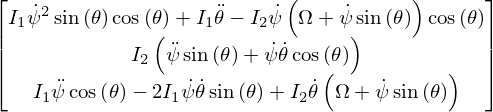

In [7]:
dhG_B = difftotalmat(hG_B,t,diffmap) + skew(iWb_B)*hG_B; dhG_B

Note that the $\mathbf b_2$ component of ${}^\mathcal{I}\boldsymbol{\omega}^\mathcal{B} \times  \mathbf h_G$  is zero:

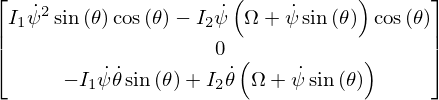

In [11]:
skew(iWb_B)*hG_B

Define $C \triangleq \Omega + \dot\psi\sin\theta$ and substitute into $\left[\vphantom{\frac{\mathrm{d}}{\mathrm{d}t}}^\mathcal{I}\frac{\mathrm{d}}{\mathrm{d}t}  {}^\mathcal{I} \mathbf h_G\right]_\mathcal{B}$:

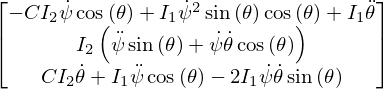

In [8]:
dhG_B_simp = dhG_B.subs(Omega+psid*sin(th),C); dhG_B_simp

Assume an external torque generating moment about $G$ of $\mathbf M_G = -M_1\mathbf b_1$:

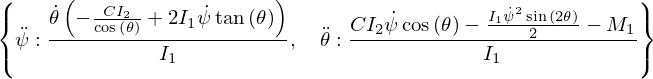

In [9]:
solve([dhG_B_simp[0] + M1,dhG_B_simp[2]],[thdd,psidd])